<a href="https://colab.research.google.com/github/lilandracunha/projetos_data_science/blob/main/ml_outubro_rosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color = "hotpink"> Machine Learning ::: Classificação do Câncer de Mama </font>


<p>O câncer de mama é a neoplasia com maior taxa de mortalidade entre <a href="https://www.inca.gov.br/numeros-de-cancer")>mulheres no Brasil</a>. Em 2018 o Sistema de Informações sobre a Mortalidade (SIM) registrou <a href="https://www.inca.gov.br/aplicativos/atlas-de-mortalidade-por-cancer">17.572 óbitos</a> e para 2020 o Instituto Nacional de Câncer (INCA) estimou <a href="https://www.inca.gov.br/estimativa/estado-capital/brasil">66.280 novos casos</a> da doença.
</br>
</br>
<p>De uma forma geral, o câncer tem início quando ocorre mutação nas células, fazendo com que se multipliquem de forma desordenada. Tal mutação pode se dar por <a href="https://www.cancer.org/cancer/cancer-causes/general-info/known-and-probable-human-carcinogens.html">diversos fatores</a>, dentre eles: idade, predisposição genética, sistema imunológico debilitado, hábitos alimentares, sedentarismo, tabagismo e consumo de álcool. Sendo assim, algumas ações podem ser tomadas para <a href="http://www.oncoguia.org.br/conteudo/causas-do-cancer/80/1/">diminuir as chances</a> de desenvolver a doença (levando em consideração os agentes externos).
</br>
</br>
<p>O sintoma mais comum do câncer de mama é o aparecimento de nódulo não doloroso e endurecido e alguns <a href="https://antigo.saude.gov.br/saude-de-a-z/cancer-de-mama">sinais</a> também servem de alerta: alteração no tamanho ou formato da mama, causando assimetria; pele vermelha ou inchada; descamação no mamilo e presença de secreção. Conhecendo o seu corpo, a mulher é capaz de observar mais facilmente qualquer alteração, o que pode levar a uma detecção precoce da doença, aumentando as chances de tratamento e cura através de medidas menos invasivas.
</br>
</br>
<p>Visando, principalmente, maior conscientização sobre a doença, seu diagnóstico precoce e redução da mortalidade, foi criado através da Fundação Susan G. Komen for the Cure o movimento Outubro Rosa, no qual muitas instituições <a href="https://www.inca.gov.br/assuntos/outubro-rosa">disseminam dados preventivos</a> e estimulam a realizações de exames. 


## <font color = "silver"> Dados utilizados </font>

<p>Aproveitando o <font color = "hotpink">Outubro Rosa</font>, criei meu primeiro modelo de <i>machine learning</i> para a detecção do câncer de mama. Após busca realizada no site Kaggle, o <i>dataset</i> selecionado foi o <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data">Breast Cancer Wisconsin (Diagnostic)</a>, que possui 32 colunas utilizáveis e 569 entradas:

In [2]:
# Fiz upload do dataset no drive e para a sua importação utilizei a biblioteca pandas
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_raw = pd.read_csv('/content/drive/My Drive/Projetos_DS/wisconsin_breast_cancer.csv')

In [4]:
# Visualizar as 5 primeiras entradas
df_raw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# É possível observar que a última coluna possui valores indefinidos, apresentando erro, desta forma, irei descartá-la
df_raw.drop('Unnamed: 32', axis=1, inplace=True) 

<p>A variável <i>target</i> do estudo está no diagnóstico, classificado como maligno ou benigno; as observações geradas foram obtidas através da aspiração de células mamárias e descrevem as características de seus núcleos, sendo assim, após a exclusão da coluna que apresentava erro, temos:


*   ID: número de identificação;
*   Diagnosis: B = benigno/M = maligno;
</br>
</br>Foram utilizadas dez características dos núcleos celulares:


* Radius;
* Texture: desvio padrão dos valores de uma escala de cinza;
* Perimeter;
* Area;
* Smoothness: variação local em comprimentos de raio;
* Compactness: compacidade – calculada por perímetro elevado ao quadrado dividido pela área – 1 (“perimeter^2/area - 1.0”);
* Concavity: concavidade das porções do contorno;
* Concave points: número de porções côncavas no contorno; 
* Symmetry;
* Fractal dimension: dimensão fractal.
<p> Para cada uma dessas características foram calculadas: média, erro padrão e a média dos três maiores valores, gerando 30 variáveis.





## <font color = "silver"> Análise exploratória </font>

<p>Para entender melhor o conjunto de dados é necessário fazer a análise exploratória, que ajudará a extrair informações.

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Dimensões do dataset
df_raw.shape

(569, 32)

In [9]:
# Para entender melhor os tipos de dados que serão abordados, optei por visualizar as 10 primeiras linhas do conjunto
df_raw.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [10]:
# Visualizar os tipos de dados de cada atributo do dataset
df_raw.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<p>Com exceção de ID e diagnosis, todas as colunas possuem entradas numéricas do tipo float e abaixo está o resumo estatístico de tais variáveis: 

In [11]:
# Sumário estatístico de cada atributo do dataset
df_raw.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# É possível observar que o dataset não possui valores nulos 
df_raw.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
# Verificar o balanceamento
df_raw.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

<p>Através do <i>group by</i> é possível ver que há um desbalanceamento que pode ser demonstrado no gráfico abaixo: 

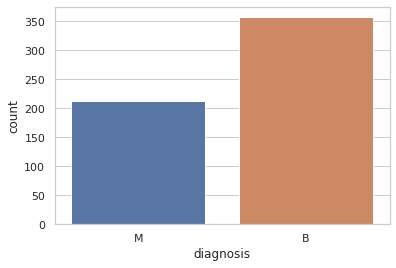

In [14]:
# Gráfico de barras com os diagnósticos
fig, ax = plt.subplots()
sns.countplot('diagnosis', data=df_raw, ax=ax)
plt.show()

In [15]:
# Optei por eliminar a coluna ID, pois ela não vai interferir nas análises
# Para isso, criei um segundo dataframe que recebeu o original menos a coluna ID
# df_1 = df_raw
df_raw.drop('id', axis=1, inplace=True) 

<p>As variáveis podem ser visualizadas lado a lado por meio do histograma:

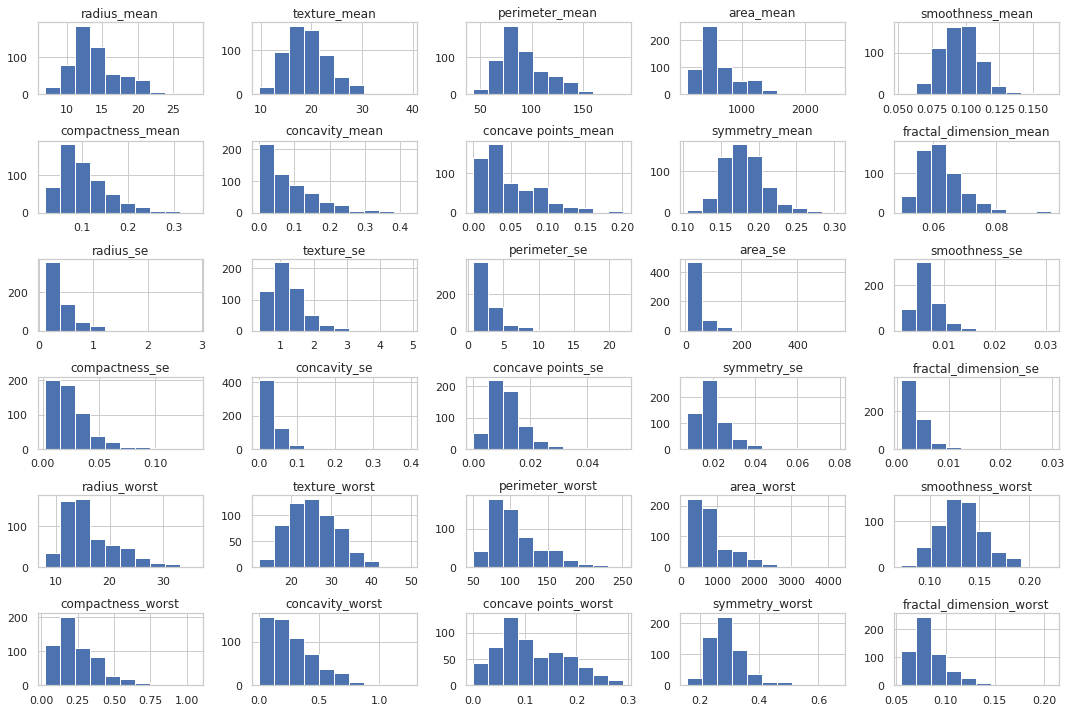

In [16]:
# Histograma com as variáveis 
fig, ax = plt.subplots(figsize=(15,10))
df_raw.hist(ax=ax)
plt.tight_layout()

<p>É possível notar que alguns valores estão mais para a esquerda do histograma, enquanto que outros apresentam-se próximos à média.

In [17]:
# Correlação de Pearson (checando possibilidades de atributos colineares)
df_raw.corr(method = 'pearson')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


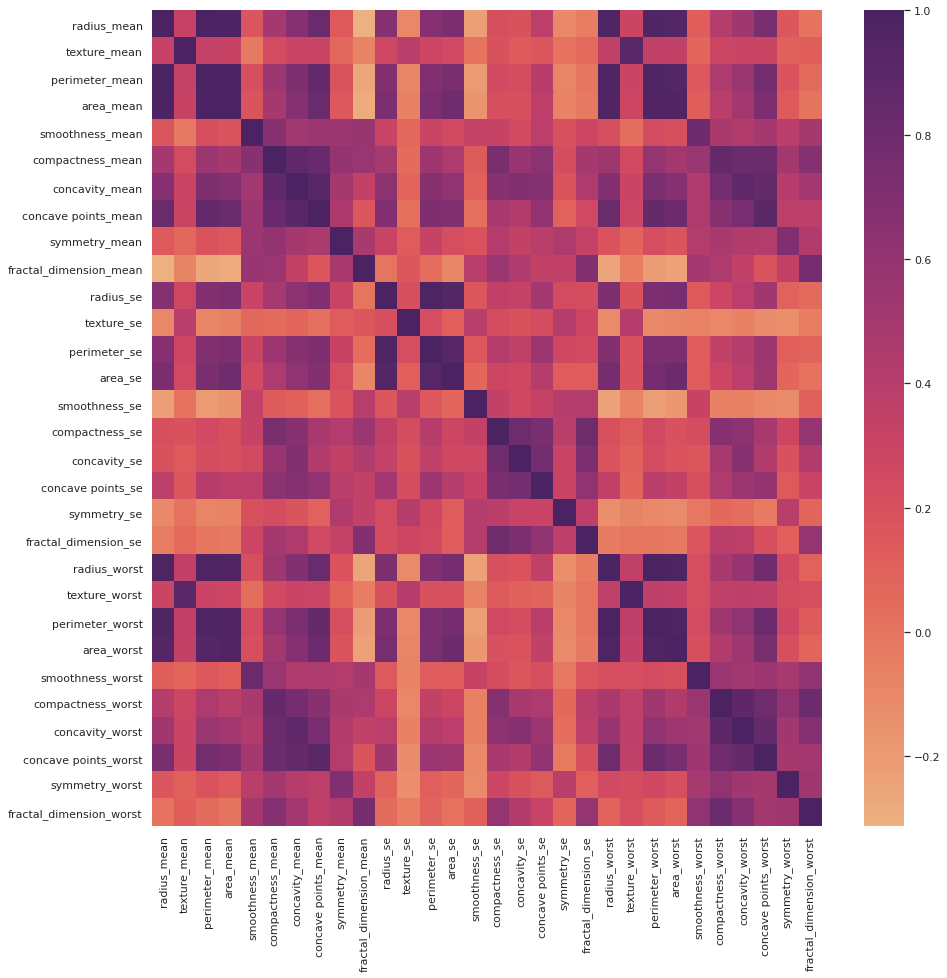

In [18]:
# Correlação de Pearson em heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_raw.corr(), cmap='flare', ax=ax)
plt.show()

<p>De acordo com o heatmap é possível observar que grande parte das variáveis apresentam correlação positiva.

<p>Apesar do dataset não estar balanceado, optei por utilizá-lo dessa forma para a criação do modelo.

## <font color = "silver"> Preparando os dados para Machine Learning </font>

<p>Para começar a criação do modelo, foi necessário separar a variável <i>target</i> das demais e transformá-la em um conjunto numérico: 

In [21]:
# No próximo passo, separei as variáveis, fazendo com que o conjunto y contenha apenas o target
x = df_raw.drop(['diagnosis'], axis=1)
y = df_raw['diagnosis']

In [22]:
# Vou começar alterando a variável alvo categórica para numérica
from sklearn.preprocessing import LabelEncoder

# Utilizando o label encoder para transformar a variável target
y = LabelEncoder().fit_transform(y)
# Nesse caso, o valor M (maligno) será transformado em 1, enquanto que o B (benigno) será 0

<p>Para evitar que haja enviesamento no modelo, há técnicas que possibilitam que os dados fiquem na mesma grandeza. Abaixo, vou testar a normalização (através de dois métodos) e a padronização e observar como ficaram os dados:

In [24]:
# Transformando os dados para a mesma escala (entre 0 e 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(x)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", x)
print("\nDados Normalizados: \n\n", rescaledX[0:, :])

Dados Originais: 

      radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]

Dados Normalizados: 

 [[0.521

In [25]:
# Normalizando os dados (comprimento igual a 1)
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(x)
normalizedX = scaler.fit_transform(x)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", x)
print("\nDados Normalizados: \n\n", normalizedX[0:, :])

Dados Originais: 

      radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]

Dados Normalizados: 

 [[7.925

In [26]:
from sklearn.preprocessing import StandardScaler

# Padronizando os dados (0 para a média, 1 para o desvio padrão)
scaler = StandardScaler().fit(x)
standardX = scaler.transform(x)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", x)
print("\nDados Normalizados: \n\n", standardX[0:, :])

Dados Originais: 

      radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]

Dados Normalizados: 

 [[ 1.09

<p>A seguir, separo os dados para treino e teste afim de visualizar a acurácia dos mesmos num modelo de Decision Tree. Nessa próxima etapa será possível decidir quais dados serão utilizados (brutos, normalizados ou padronizados).

In [28]:
# Import do módulo
from sklearn.model_selection import train_test_split

array = df_raw.values

# X = array[:, 1:30] # *
# X = rescaledX     # *
# X = normalizedX   # *
X = standardX     # **
Y = array[:, 0]

# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Import dos módulos
from sklearn.tree import DecisionTreeClassifier

# Criação do modelo
modelo = DecisionTreeClassifier()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = modelo.score(X_teste, Y_teste)

print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 93.617%


<p>Os dados padronizados apresentaram melhor acurácia, desta forma, serão utilizados no modelo.

## <font color = "silver"> Criação do modelo </font>

<p>Para a seleção do modelo testarei os métodos não-lineares KNN (<i>K-Nearest Neighbors</i>) e CART (<i>Classification and Regression Trees</i>) e o método <i>ensemble Random Forest</i>.

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

array = df_raw.values

# Separando o array em componentes de input e output
# X = array[:, 1:30]
# X = rescaledX
# X = normalizedX
X = standardX
Y = array[:, 0]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos
modelos = []
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('Random Forest', RandomForestClassifier()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.966604 (0.016559)
CART: 0.931516 (0.025281)
Random Forest: 0.957895 (0.026257)


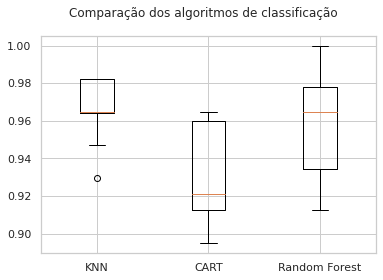

In [43]:
# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação dos algoritmos de classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

<p>Apesar do KNN ter apresentado um bom desempenho, acredito que a melhor opção para esse caso é o Random Forest, que cria várias árvores de decisão de maneira aleatória, aumentando a precisão do modelo.

In [37]:
# Seleção do modelo
modelo_rf = RandomForestClassifier()

# Treinamento do modelo 
modelo_rf.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<p>Por fim, utilizei o pacote metrics para avaliar a performance do algoritmo selecionado, com ele é possível visualizar alguns fatores importantes:

*  Acurácia: demonstra quanto o modelo é capaz de acertar em suas previsões;
*  Precisão: traz o total de positivos dividido pela soma de total de positivos com os falsos positivos, assim, mostrando qual a proporção de identificações positivas foi correta;
* Recall: quantos valores positivos são identificados corretamente pelo modelo;
* f-score: é o balanço entre a precisão e o recall do modelo. 



In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Fazendo previsões no conjunto de testes
y_predict = modelo_rf.predict(X_teste)

# Determinar a acurácia do modelo
print('Acurácia', accuracy_score(Y_teste, y_pred))

# Classification report
print('\n\nClassification report')
print(classification_report(Y_teste, y_predict))

Acurácia 0.973404255319149


Classification report
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       129
           M       0.97      0.95      0.96        59

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



## <font color = "silver"> Considerações finais </font>

<p>Estamos vivendo uma era em que a utilização da tecnologia está cada vez mais acessível e presente em todas as áreas. A implantação de machine learning na área da saúde possibilita diagnósticos mais rápidos e extremamente precisos.
</br><br>
Pensando no câncer de mama, é importante salientar que a prevenção e o diagnóstico precoce são de suma importância para diminuição das taxas de mortalidade e tal atenção não deve ser dada apenas durante o mês de conscientização.
